# PYTHON ASSIGNMENT
### Problem Statement: Trade Reporting data Analysis
You have been given a dataset containing Regulatory trade reports for a financial institution.
malikjb35/pythonTest (github.com)
#### Problem 1
1. Exploratory Data Analysis and provide insight from the data: Conduct analysis on the dataset
to gather insights and generate relevant statistics.
2. Data Visualization: Create visualizations to present the results of the data analysis.
3. Reporting: Generate a summary report that presents the findings from the data analysis and
visualizations. Include key insights.

#### Problem 2
- Perform required data standardisation and normalization activities.
- Find Association, correlation among columns in above dataset.
- Find categorical features from this dataset for a classification model(use reporting status column as target vector if needed)
- Implement the encoding strategy for such identified columns.
- Group similar transaction together and identify no of such similar group.

### Problem 1 Solution :
#### 1. Exploratory Data Analysis and provide insight from the data: Conduct analysis on the dataset to gather insights and generate relevant statistics

In [95]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Load the dataset
data = pd.read_csv("D:/USER/SREE/Jupyter Notebook Workspace/Assignments/Trade Reporting Data Analysis/Testdata.csv")

C:\Users\SREEPARNA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [97]:
# Check Dimension of the data
print(data.shape)

(50000, 26)


In [98]:
# View the first few rows of the dataset
print(data.head())

   tradeId regulator  version assetClass                   clDateTime  \
0        1      SEBI        1         FX  2023-07-18T11:47:26.075000Z   
1        2      SEBI        9         FX  2023-08-02T03:12:48.207000Z   
2        3      SEBI        8         FX  2023-05-09T07:42:36.475000Z   
3        4      SEBI        1         FX  2023-10-01T05:02:54.209000Z   
4        5      SEBI        1         FX  2023-01-23T20:53:01.076000Z   

   clStatus   cflag  eFlag                    cDateTime         method  ...  \
0      True   FULLY  False  2023-12-10T07:37:58.548000Z  NonElectronic  ...   
1     False   FULLY  False  2023-10-03T22:32:10.991000Z   NotConfirmed  ...   
2     False   FULLY  False  2023-03-09T20:32:31.302000Z  NonElectronic  ...   
3     False   FULLY   True  2023-11-21T06:53:09.983000Z     Electronic  ...   
4      True  ONEWAY  False  2023-08-05T17:06:08.895000Z     Electronic  ...   

   seller                      endDate     sType  Product        price  \
0  Party1  2

In [99]:
# Summary statistics
print(data.describe())

            tradeId       version          rate          price       PartyId
count  50000.000000  50000.000000  50000.000000   15014.000000  50000.000000
mean   25000.500000      4.991940   4985.640510  502292.898972      3.163600
std    14433.901067      2.593339   2892.605229  288205.734165      1.342919
min        1.000000      1.000000      0.630700     108.503208      1.000000
25%    12500.750000      3.000000   2473.364300  253646.139675      2.000000
50%    25000.500000      5.000000   4988.018500  501724.834200      3.000000
75%    37500.250000      7.000000   7484.013200  751081.198725      4.000000
max    50000.000000      9.000000   9999.865100  999940.821500      5.000000


In [100]:
# Check for missing values
print(data.isnull().sum())

tradeId                 0
regulator               0
version                 0
assetClass              0
clDateTime              0
clStatus                0
cflag                   0
eFlag                   0
cDateTime               0
method                  0
rate                    0
expirationDate          0
eventT                  0
mType                   0
Timestamp               0
quantity                0
seller                  0
endDate                 0
sType                   0
Product                 0
price               34986
terminationDate      6209
party                   0
PartyId                 0
transactionType         0
Reporting Status        0
dtype: int64


In [101]:
# Impute missing values for 'price' column with the median value
median_price = data['price'].median()
data['price'].fillna(median_price, inplace=True)

In [102]:
# Impute missing values for terminationDate column with a placeholder value
data['terminationDate'].fillna(data['terminationDate'].mode()[0], inplace=True)

In [103]:
# Check again for missing values
print(data.isnull().sum())

tradeId             0
regulator           0
version             0
assetClass          0
clDateTime          0
clStatus            0
cflag               0
eFlag               0
cDateTime           0
method              0
rate                0
expirationDate      0
eventT              0
mType               0
Timestamp           0
quantity            0
seller              0
endDate             0
sType               0
Product             0
price               0
terminationDate     0
party               0
PartyId             0
transactionType     0
Reporting Status    0
dtype: int64


In [104]:
# Again summarize the statistics
print(data.describe())

            tradeId       version          rate          price       PartyId
count  50000.000000  50000.000000  50000.000000   50000.000000  50000.000000
mean   25000.500000      4.991940   4985.640510  501895.412690      3.163600
std    14433.901067      2.593339   2892.605229  157926.965540      1.342919
min        1.000000      1.000000      0.630700     108.503208      1.000000
25%    12500.750000      3.000000   2473.364300  501724.834200      2.000000
50%    25000.500000      5.000000   4988.018500  501724.834200      3.000000
75%    37500.250000      7.000000   7484.013200  501724.834200      4.000000
max    50000.000000      9.000000   9999.865100  999940.821500      5.000000


#### 2. Data Visualization: Create visualizations to present the results of the data analysis.

In [105]:
# Select numerical features for analysis
numerical_features = ['price','rate']

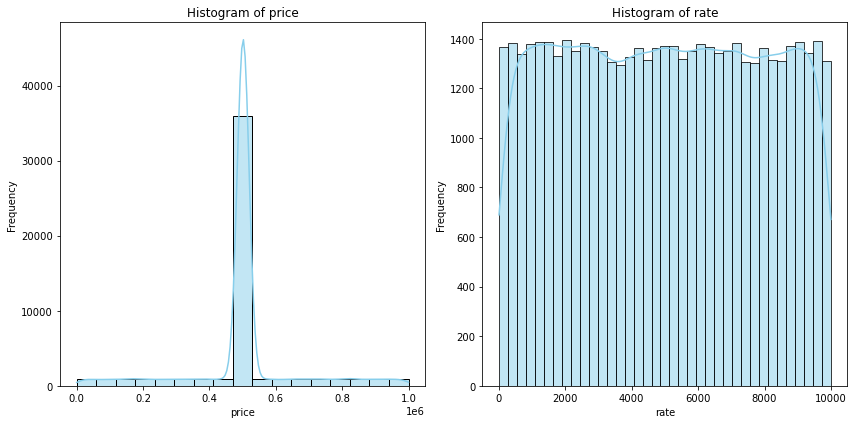

In [107]:
# Visualization 1: Plot Histograms for numerical features
plt.figure(figsize=(12,6))
for i, feature in enumerate(numerical_features,1):
    plt.subplot(1,len(numerical_features),i)
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

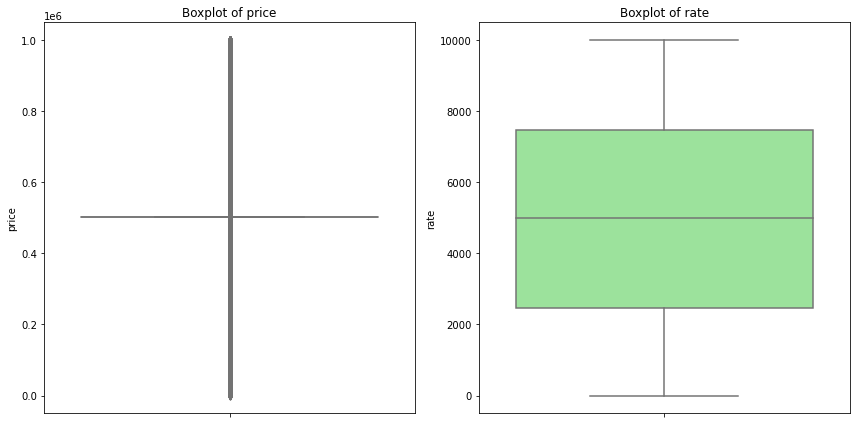

In [108]:
# Visualization 2: Plot box plots for numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(data=data, y=feature, color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

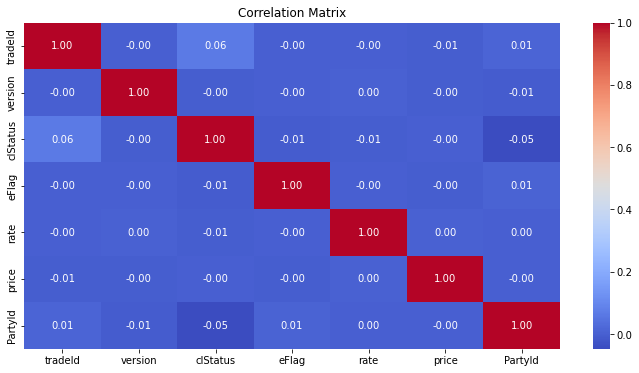

In [109]:
# Visualization 3: Explore relationships between variables using correlation analysis
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

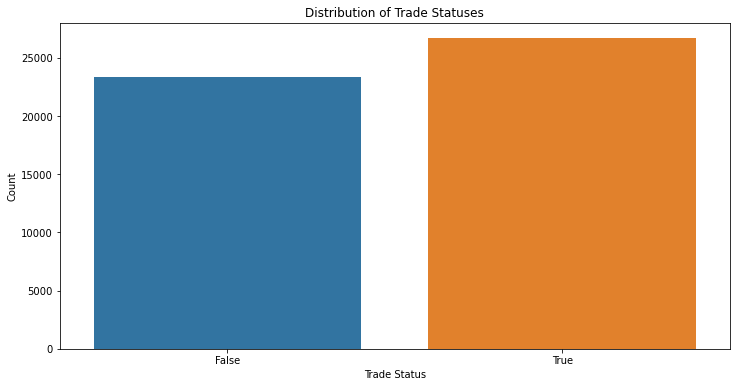

In [110]:
# Visualization 4: Distribution of trade statuses
plt.figure(figsize=(12, 6))
sns.countplot(x='clStatus', data=data)
plt.title('Distribution of Trade Statuses')
plt.xlabel('Trade Status')
plt.ylabel('Count')
plt.show()

#### 3. Reporting: Generate a summary report that presents the findings from the data analysis and visualizations. Include key insights.

In [94]:
# Summary report
summary_report = """
Summary Report:

1. Asset Class Distribution:
   - Most common asset class: {asset_class_common}
   - Least common asset class: {asset_class_least}

2. Transaction Type Distribution:
   - Most common transaction type: {transaction_type_common}
   - Least common transaction type: {transaction_type_least}

3. Price Analysis:
   - Average price: ${average_price:.2f}
   - Maximum price: ${max_price:.2f}
   - Minimum price: ${min_price:.2f}

4. Missing Values Handling:
   - Price column: Filled missing values with median
   - TerminationDate column: Filled missing values with mode
   
5. Count of Transactions by Asset Class: 
        {asset_class_counts}

6. Distribution of Trade Statuses: 
        {trade_status_counts}

"""

# Calculate statistics
average_price = data['price'].mean()
max_price = data['price'].max()
min_price = data['price'].min()
asset_class_common = data['assetClass'].mode()[0]
asset_class_least = data['assetClass'].value_counts().idxmin()
transaction_type_common = data['transactionType'].mode()[0]
transaction_type_least = data['transactionType'].value_counts().idxmin()
asset_class_counts = data['assetClass'].value_counts()
trade_status_counts=data['clStatus'].value_counts()

# Print summary report
print(summary_report.format(
    asset_class_common=asset_class_common,
    asset_class_least=asset_class_least,
    transaction_type_common=transaction_type_common,
    transaction_type_least=transaction_type_least,
    average_price=average_price,
    max_price=max_price,
    min_price=min_price,
    asset_class_counts=asset_class_counts,
    trade_status_counts=trade_status_counts
))



Summary Report:

1. Asset Class Distribution:
   - Most common asset class: FX
   - Least common asset class: FX

2. Transaction Type Distribution:
   - Most common transaction type: TRADE
   - Least common transaction type: Exit

3. Price Analysis:
   - Average price: $501895.41
   - Maximum price: $999940.82
   - Minimum price: $108.50

4. Missing Values Handling:
   - Price column: Filled missing values with median
   - TerminationDate column: Filled missing values with mode
   
5. Count of Transactions by Asset Class: 
        FX    50000
Name: assetClass, dtype: int64

6. Distribution of Trade Statuses: 
        True     26684
False    23316
Name: clStatus, dtype: int64




### Problem 2 Solution :
- Perform required data standardisation and normalization activities.
- Find Association, correlation among columns in above dataset.
- Find categorical features from this dataset for a classification model(use reporting status column as target vector if needed)
- Implement the encoding strategy for such identified columns.
- Group similar transaction together and identify no of such similar group.

In [119]:
# Import the libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import chi2
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import category_encoders as ce

In [113]:
# Data Standardization and Normalization
scaler = StandardScaler()
data_scaled = data.copy()
num_cols=data_scaled.select_dtypes(include=['float64','int64']).columns
data_scaled[num_cols]=scaler.fit_transform(data_scaled[num_cols])

In [134]:
# Check data types of each column
print(data.select_dtypes(include=['object']).dtypes)


regulator          object
assetClass         object
clDateTime         object
cflag              object
cDateTime          object
method             object
expirationDate     object
eventT             object
mType              object
Timestamp          object
quantity           object
seller             object
endDate            object
sType              object
Product            object
terminationDate    object
party              object
transactionType    object
dtype: object


In [137]:
# Association Analysis
association_matrix = np.zeros((len(data.columns), len(data.columns)))
for i, j in combinations(range(len(data.columns)), 2):
    if data.iloc[:, i].dtype == 'O' and data.iloc[:, j].dtype == 'O':
        chi2_stat, _ = chi2(data.iloc[:, i].fillna('NA').to_numpy().reshape(-1, 1), data.iloc[:, j].fillna('NA'))
        association_matrix[i, j] = chi2_stat
        association_matrix[j, i] = chi2_stat
        
print("Association Matrix:")
print(association_matrix)

In [149]:
# Correlation Analysis
correlation_matrix = data_scaled.corr()

# Display result
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
           tradeId   version  clStatus     eFlag      rate     price   PartyId
tradeId   1.000000 -0.002102  0.063872 -0.000457 -0.000581 -0.005098  0.010536
version  -0.002102  1.000000 -0.002921 -0.001846  0.003418 -0.002838 -0.009178
clStatus  0.063872 -0.002921  1.000000 -0.007996 -0.006058 -0.001147 -0.047483
eFlag    -0.000457 -0.001846 -0.007996  1.000000 -0.000535 -0.003193  0.009376
rate     -0.000581  0.003418 -0.006058 -0.000535  1.000000  0.003067  0.000781
price    -0.005098 -0.002838 -0.001147 -0.003193  0.003067  1.000000 -0.000467
PartyId   0.010536 -0.009178 -0.047483  0.009376  0.000781 -0.000467  1.000000


In [150]:
# Categorical Feature Identification
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Display Results
print("\nCategorical Features:", categorical_features)


Categorical Features: ['regulator', 'assetClass', 'clDateTime', 'cflag', 'cDateTime', 'method', 'expirationDate', 'eventT', 'mType', 'Timestamp', 'quantity', 'seller', 'endDate', 'sType', 'Product', 'terminationDate', 'party', 'transactionType']


In [151]:
# Encoding Strategy Implementation
data_encoded = data.copy()
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data_encoded[feature] = le.fit_transform(data_encoded[feature])
    label_encoders[feature] = le
    
print("\nEncoded DataFrame:")
print(data_encoded)


Encoded DataFrame:
       tradeId  regulator  version  assetClass  clDateTime  clStatus  cflag  \
0            1          0        1           0       27209      True      1   
1            2          0        9           0       29230     False      1   
2            3          0        8           0       17571     False      1   
3            4          0        1           0       37351     False      1   
4            5          0        1           0        3196      True      2   
...        ...        ...      ...         ...         ...       ...    ...   
49995    49996          0        8           0       25309     False      2   
49996    49997          0        2           0       33429     False      1   
49997    49998          0        8           0       40644     False      5   
49998    49999          0        2           0       37216      True      2   
49999    50000          0        5           0       40767     False      3   

       eFlag  cDateTime  method

In [152]:
# Grouping Similar Transactions
similar_groups = data.groupby(['assetClass', 'transactionType']).size().reset_index(name='count')

# Display results
print("\nSimilar Transaction Groups:")
print(similar_groups)


Similar Transaction Groups:
  assetClass transactionType  count
0         FX            EXIT  24366
1         FX            Exit      1
2         FX           TRADE  25633


In [153]:
# Summary report2
summary_report2 = """
Summary Report2 :

1. Association Matrix:
   {association_matrix}

2. Correlation Matrix:
   {correlation_matrix}

3. Categorical Feature:
   {categorical_features}
   
4. Encoded Dataframe:
   {data_encoded}
   
5. Similar Transaction Groups: 
   {similar_groups}


"""


# Print summary report2
print(summary_report2.format(
    association_matrix=association_matrix,
    correlation_matrix=correlation_matrix,
    categorical_features=categorical_features,
    data_encoded=data_encoded,
    similar_groups=similar_groups
))


Summary Report2 :

1. Association Matrix:
   [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 